In [2]:
import os
import configparser

# Loading configurations
configParser = configparser.RawConfigParser()   
configFilePath = r'configuration.txt'
configParser.read(configFilePath)
path =  configParser.get('stackOutputImages', 'path')

In [3]:
from glob import glob
model_dirs = glob(path + '*', recursive = True)
model_dirs

['/media/gamal/Passport/Evaluations/Audio Only',
 '/media/gamal/Passport/Evaluations/Full Input',
 '/media/gamal/Passport/Evaluations/No Audio',
 '/media/gamal/Passport/Evaluations/No Image Guide',
 '/media/gamal/Passport/Evaluations/No Speaker Embedding']

In [4]:
import pandas as pd
from pathlib import Path

df = pd.DataFrame(columns = ['model_name','cond_scale','id','path'])
i = 0
cond_scale_values = [0,2,4,6,8]
gen_faces_folder =  configParser.get('stackOutputImages', 'gen_faces_folder')
for model_dir in model_dirs:
    model_name = os.path.basename(os.path.normpath(model_dir))
    for cond_scale_value in cond_scale_values:
        dir = model_dir + '/' + str(cond_scale_value) + '/' + gen_faces_folder
        for root, dirs, files in os.walk(dir):

            for file in files:
                id = os.path.basename(Path(root).parent.absolute())
                df.loc[i] = [model_name,str(cond_scale_value),id,root + '/' + file]
                #print(model_name + ' ' + str(cond_scale_value) + ' ' + id + ' ' + root + '/' + file)
                i += 1


In [5]:
df.head()

,model_name,cond_scale,id,path
0,Audio Only,0,id00017,/media/gamal/Passport/Evaluations/Audio Only/0...
1,Audio Only,0,id00061,/media/gamal/Passport/Evaluations/Audio Only/0...
2,Audio Only,0,id00081,/media/gamal/Passport/Evaluations/Audio Only/0...
3,Audio Only,0,id00154,/media/gamal/Passport/Evaluations/Audio Only/0...
4,Audio Only,0,id00419,/media/gamal/Passport/Evaluations/Audio Only/0...


In [6]:
faces_folder =  configParser.get('stackOutputImages', 'faces_folder')
model_name = os.path.basename(os.path.normpath(faces_folder))
dir = faces_folder
for root, dirs, files in os.walk(dir):
    for file in files:
        id = os.path.basename(Path(root).parent.absolute())
        df.loc[i] = [model_name,None,id,root + '/' + file]
        #print(model_name + ' ' + str(cond_scale_value) + ' ' + id + ' ' + root + '/' + file)
        i += 1


In [7]:
df.tail()

,model_name,cond_scale,id,path
3064,Original Face,None,id09017,/media/gamal/Passport/Datasets/VoxCeleb2Test/O...
3065,Original Face,None,id01509,/media/gamal/Passport/Datasets/VoxCeleb2Test/O...
3066,Original Face,None,id02725,/media/gamal/Passport/Datasets/VoxCeleb2Test/O...
3067,Original Face,None,id04232,/media/gamal/Passport/Datasets/VoxCeleb2Test/O...
3068,Original Face,None,id05714,/media/gamal/Passport/Datasets/VoxCeleb2Test/O...


In [8]:
image_guides_folder =  configParser.get('stackOutputImages', 'image_guides_folder')
model_name = os.path.basename(os.path.normpath(image_guides_folder))
dir = image_guides_folder
for root, dirs, files in os.walk(dir):
    for file in files:
        id = os.path.basename(Path(root).parent.absolute())
        df.loc[i] = [model_name,None,id,root + '/' + file]
        #print(model_name + ' ' + str(cond_scale_value) + ' ' + id + ' ' + root + '/' + file)
        i += 1

In [9]:
df.tail()

,model_name,cond_scale,id,path
3182,Image Guide,None,id03839,/media/gamal/Passport/Datasets/VoxCeleb2Test/I...
3183,Image Guide,None,id01509,/media/gamal/Passport/Datasets/VoxCeleb2Test/I...
3184,Image Guide,None,id03862,/media/gamal/Passport/Datasets/VoxCeleb2Test/I...
3185,Image Guide,None,id04950,/media/gamal/Passport/Datasets/VoxCeleb2Test/I...
3186,Image Guide,None,id07312,/media/gamal/Passport/Datasets/VoxCeleb2Test/I...


In [10]:
ids_unique = df['id'].unique()
ids_unique
models = ['Original Face','Image Guide','Full Input', 'No Image Guide',
          'No Speaker Embedding', 'No Audio','Audio Only' ]

In [29]:
import sys
from PIL import Image
import matplotlib.pyplot as plt
def stack_images(stack_these):

  f, axarr = plt.subplots(1,len(stack_these),dpi=1200)
  for i in range(len(stack_these)):
    axarr[i].axis("off")
    axarr[i].set_title(stack_these[i][0] + ' ' + stack_these[i][1],fontsize=1)
    axarr[i].imshow(Image.open( stack_these[i][2])    )


ZeroDivisionError: division by zero

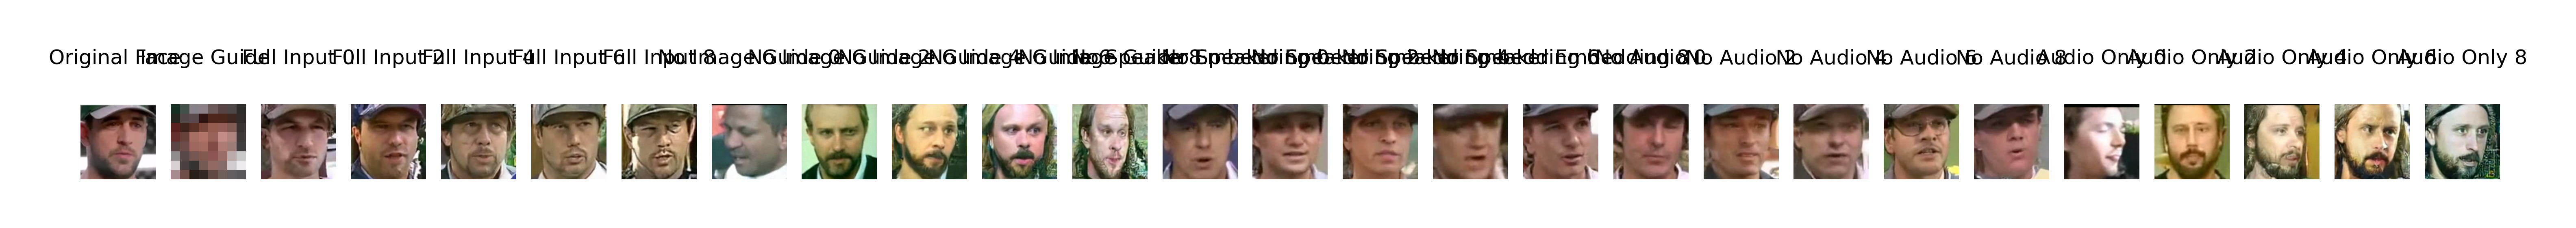

In [30]:


for id_unique in ids_unique:
    stack_these = []
    for model in models:
        df_filtered = df.loc[(df['id'] == id_unique) 
                        & (df['model_name'] == model)
                        & (df['cond_scale'].isna())]
        if(not df_filtered.empty):
            stack_these.append([model,'',df_filtered.iloc[0]['path']])
        for cond_scale_value in cond_scale_values:
            df_filtered = df.loc[(df['id'] == id_unique) 
                                 & (df['model_name'] == model)
                                 & (df['cond_scale'] == str(cond_scale_value))]
            if(not df_filtered.empty):
                stack_these.append([model,str(cond_scale_value),
                                    df_filtered.iloc[0]['path']])
    stack_images(stack_these)
    print(0/0)

In [119]:
stack_these

[['Original Face',
  '',
  '/media/gamal/Passport/Datasets/VoxCeleb2Test/Original Face/mp4/id05714/2gvpaZcvAY4/00001_face_1.png'],
 ['Image Guide',
  '',
  '/media/gamal/Passport/Datasets/VoxCeleb2Test/Image Guide/mp4/id05714/2gvpaZcvAY4/00001_guide_83_.png'],
 ['Full Input',
  '0',
  '/media/gamal/Passport/Evaluations/Full Input/0/Voxceleb2TestGeneratedFaces/mp4/id05714/2gvpaZcvAY4/00001_generated_face_.png'],
 ['Full Input',
  '2',
  '/media/gamal/Passport/Evaluations/Full Input/2/Voxceleb2TestGeneratedFaces/mp4/id05714/2gvpaZcvAY4/00001_generated_face_.png'],
 ['Full Input',
  '4',
  '/media/gamal/Passport/Evaluations/Full Input/4/Voxceleb2TestGeneratedFaces/mp4/id05714/2gvpaZcvAY4/00001_generated_face_.png'],
 ['Full Input',
  '6',
  '/media/gamal/Passport/Evaluations/Full Input/6/Voxceleb2TestGeneratedFaces/mp4/id05714/2gvpaZcvAY4/00001_generated_face_.png'],
 ['Full Input',
  '8',
  '/media/gamal/Passport/Evaluations/Full Input/8/Voxceleb2TestGeneratedFaces/mp4/id05714/2gvpaZcvAY